In [1]:
!pip install opendatasets

In [3]:
import opendatasets as od
od.download('https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: nayanawasthi
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset


100%|██████████| 2.70G/2.70G [00:17<00:00, 167MB/s] 


In [4]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

**Data preprocessing**
*Training Image preprocessing*

In [6]:
training_set = tf.keras.utils.image_dataset_from_directory(
    '/content/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70295 files belonging to 38 classes.


*italicized text*

In [7]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [8]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [9]:
for x,y in training_set:
  print(x,x.shape)
  print(y,y.shape)
  break

tf.Tensor(
[[[[175.   170.   174.  ]
   [173.25 168.25 172.25]
   [175.   170.   174.  ]
   ...
   [154.75 149.75 155.75]
   [158.25 153.25 159.25]
   [159.75 154.75 160.75]]

  [[176.5  171.5  175.5 ]
   [174.   169.   173.  ]
   [176.75 171.75 175.75]
   ...
   [161.25 156.25 162.25]
   [164.25 159.25 165.25]
   [163.5  158.5  164.5 ]]

  [[173.   168.   172.  ]
   [169.5  164.5  168.5 ]
   [172.75 167.75 171.75]
   ...
   [158.   153.   159.  ]
   [156.5  151.5  157.5 ]
   [163.25 158.25 164.25]]

  ...

  [[120.25 111.25 114.25]
   [122.   113.   116.  ]
   [118.75 109.75 112.75]
   ...
   [127.75 121.75 125.75]
   [125.   119.   123.  ]
   [120.75 114.75 118.75]]

  [[118.25 109.25 112.25]
   [110.   101.   104.  ]
   [108.5   99.5  102.5 ]
   ...
   [138.75 132.75 136.75]
   [125.75 119.75 123.75]
   [134.   128.   132.  ]]

  [[114.75 105.75 108.75]
   [110.25 101.25 104.25]
   [113.5  104.5  107.5 ]
   ...
   [126.5  120.5  124.5 ]
   [123.   117.   121.  ]
   [125.5  119.5  12

*To avoid Overshooting Loss function
Choose small learning rate default 0.001 here we have taken 0.0001
There may be chance of underfitting so increase number of neuron
Add more Convolutional Layer to extract more feature from images there may be possibilty that model unable to capture relevant feature or model is confusing due to lack of feature so feed with more feature*

**Building Model**

In [14]:
from tensorflow.keras.layers import Dense, Conv2D
from tensorflow.keras.models import Sequential



In [42]:
cnn = tf.keras.models.Sequential()

# Building convolution layer

In [43]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [44]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [45]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [46]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [47]:
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [48]:

cnn.add(tf.keras.layers.Dropout(0.25))

In [49]:
cnn.add(tf.keras.layers.Flatten())

In [50]:

cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))

In [51]:
cnn.add(tf.keras.layers.Dropout(0.4)) #To avoid overfitting

In [52]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=38,activation='softmax'))

**compiling**

In [53]:
cnn.compile(optimizer=tf.keras.optimizers.legacy.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [55]:
cnn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 128, 128, 32)      896       
                                                                 
 conv2d_19 (Conv2D)          (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 63, 63, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 63, 63, 64)        18496     
                                                                 
 conv2d_21 (Conv2D)          (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 30, 30, 64)        0         
 ng2D)                                                

**model training**

In [56]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 [==============================] - 156s 70ms/step - loss: 1.3741 - accuracy: 0.5932 - val_loss: 0.4768 - val_accuracy: 0.8544
Epoch 2/10
2197/2197 [==============================] - 157s 71ms/step - loss: 0.4421 - accuracy: 0.8599 - val_loss: 0.2647 - val_accuracy: 0.9154
Epoch 3/10
2197/2197 [==============================] - 156s 71ms/step - loss: 0.2615 - accuracy: 0.9164 - val_loss: 0.2364 - val_accuracy: 0.9241
Epoch 4/10
2197/2197 [==============================] - 156s 71ms/step - loss: 0.1837 - accuracy: 0.9401 - val_loss: 0.1796 - val_accuracy: 0.9437
Epoch 5/10
2197/2197 [==============================] - 155s 70ms/step - loss: 0.1308 - accuracy: 0.9564 - val_loss: 0.1632 - val_accuracy: 0.9500
Epoch 6/10
2197/2197 [==============================] - 155s 71ms/step - loss: 0.1036 - accuracy: 0.9656 - val_loss: 0.1247 - val_accuracy: 0.9606
Epoch 7/10
2197/2197 [==============================] - 156s 71ms/step - loss: 0.0827 - accuracy: 0.9727 - val_loss: 0

**Model Evaluation**

In [57]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

2197/2197 [==============================] - 51s 23ms/step - loss: 0.0237 - accuracy: 0.9924
Training accuracy: 0.9924318790435791


In [58]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

550/550 [==============================] - 14s 24ms/step - loss: 0.1049 - accuracy: 0.9686
Validation accuracy: 0.968643307685852


**Saving Model**

In [59]:
cnn.save('plant_Disease_prediction.keras')

In [60]:
from google.colab import files
files.download('plant_Disease_prediction.keras')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [61]:
training_history.history #Return Dictionary of history

{'loss': [1.3741226196289062,
  0.44213736057281494,
  0.2615211009979248,
  0.18365801870822906,
  0.1307738721370697,
  0.10357405990362167,
  0.08265553414821625,
  0.07188990712165833,
  0.05938742682337761,
  0.0547051727771759],
 'accuracy': [0.5931716561317444,
  0.8598904609680176,
  0.9163951873779297,
  0.9401237368583679,
  0.9563980102539062,
  0.965587854385376,
  0.9727434515953064,
  0.9760438203811646,
  0.9804680347442627,
  0.9834412336349487],
 'val_loss': [0.47678884863853455,
  0.26473626494407654,
  0.2364470511674881,
  0.1796124130487442,
  0.16315509378910065,
  0.12474910914897919,
  0.15800504386425018,
  0.11274530738592148,
  0.104002945125103,
  0.1048910990357399],
 'val_accuracy': [0.8544275164604187,
  0.9154336452484131,
  0.9240837693214417,
  0.9437173008918762,
  0.9500341415405273,
  0.9605622291564941,
  0.9552128314971924,
  0.9647734761238098,
  0.9712610840797424,
  0.968643307685852]}

In [62]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [63]:
from google.colab import files
files.download('training_hist.json')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [64]:
print(training_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


**Accuracy Visualization**

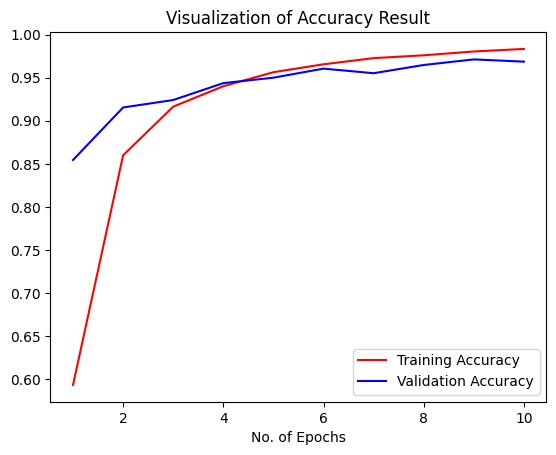

In [65]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

**Some other metrics for model evaluation**

In [66]:
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [68]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/content/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [69]:
y_pred = cnn.predict(test_set)
y_pred,y_pred.shape

17572/17572 [==============================] - 49s 3ms/step


(array([[9.9999976e-01, 3.3815581e-10, 1.6169320e-13, ..., 1.5845169e-18,
         2.7424333e-16, 1.4083388e-15],
        [9.9999917e-01, 1.8191587e-08, 5.7025128e-11, ..., 1.9475342e-15,
         1.3511950e-13, 8.1044841e-12],
        [1.0000000e+00, 1.0250167e-09, 2.2860868e-11, ..., 7.8632873e-18,
         5.8696690e-15, 3.6738760e-14],
        ...,
        [1.4499632e-08, 5.3954747e-11, 2.9220923e-08, ..., 1.4900858e-09,
         2.9745795e-09, 9.9988961e-01],
        [2.0559574e-08, 4.9571965e-11, 4.7857455e-08, ..., 2.8630989e-09,
         8.9307478e-10, 9.9999487e-01],
        [4.0920384e-13, 1.1334601e-14, 1.6949993e-13, ..., 5.8547078e-15,
         1.1731880e-12, 9.9999988e-01]], dtype=float32),
 (17572, 38))

In [70]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [71]:
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [73]:
predicted_categories = tf.argmax(y_pred, axis=1)
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [74]:
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [75]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [76]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.99      0.92      0.96       504
                                 Apple___Black_rot       1.00      0.97      0.98       497
                          Apple___Cedar_apple_rust       0.97      0.99      0.98       440
                                   Apple___healthy       0.95      0.98      0.97       502
                               Blueberry___healthy       0.98      0.99      0.98       454
          Cherry_(including_sour)___Powdery_mildew       0.97      1.00      0.98       421
                 Cherry_(including_sour)___healthy       1.00      0.98      0.99       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.94      0.93      0.94       410
                       Corn_(maize)___Common_rust_       1.00      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.94      0.96      0.

In [79]:
cm= confusion_matrix(Y_true,predicted_categories)
cm

array([[465,   2,   0, ...,   0,   0,   1],
       [  1, 483,   3, ...,   0,   0,   0],
       [  0,   0, 436, ...,   0,   0,   1],
       ...,
       [  0,   0,   0, ..., 485,   0,   0],
       [  0,   0,   0, ...,   0, 445,   0],
       [  0,   0,   1, ...,   0,   0, 476]])

**Confusion Matrix Visualization**

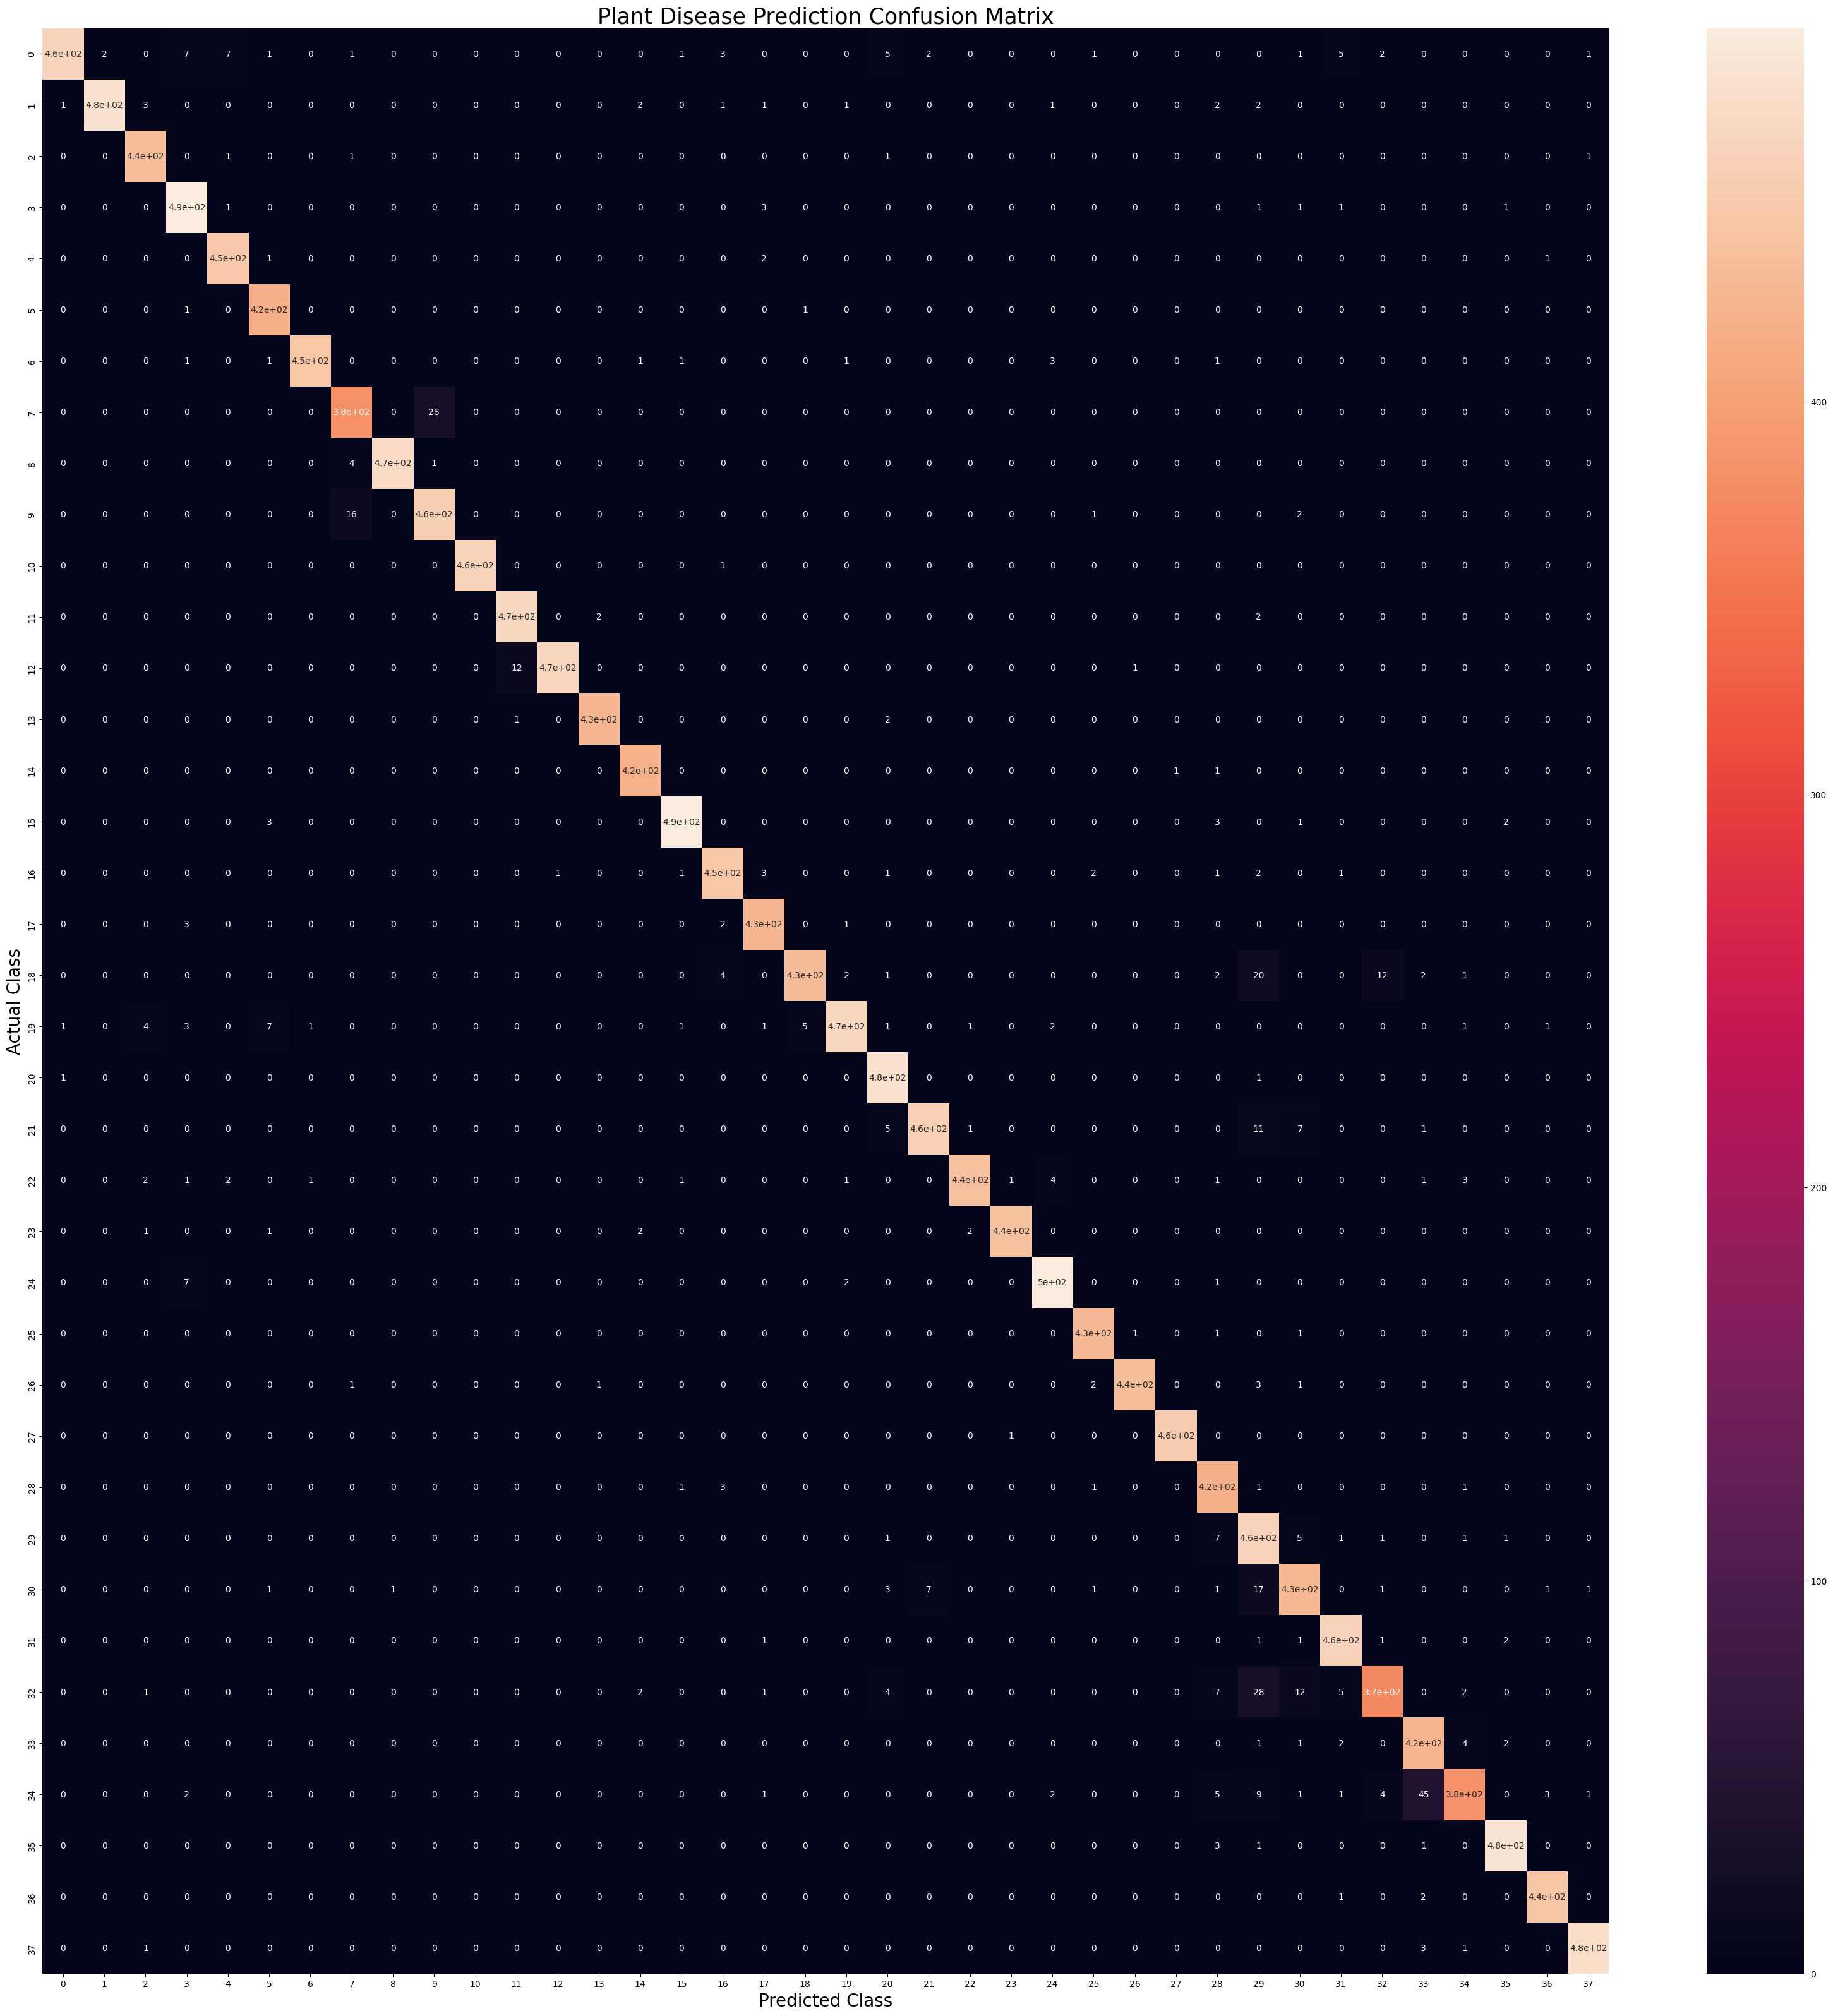

In [77]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()

**Visualising and Performing Prediction on Single image**

In [88]:
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

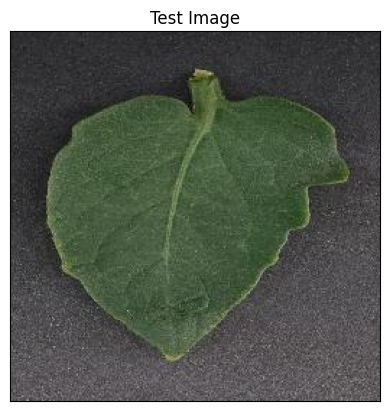

In [95]:
#Test Image Visualization
import cv2
image_path = '/content/new-plant-diseases-dataset/test/test/TomatoHealthy2.JPG'
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()



**Testing Model**

In [96]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
print(input_arr.shape)

(1, 128, 128, 3)


In [97]:
predictions = cnn.predict(input_arr)
print(predictions,predictions.shape)

1/1 [==============================] - 0s 21ms/step
[[7.2091580e-06 1.4710440e-07 1.0214640e-05 5.7246612e-04 4.0008731e-06
  1.2931189e-06 2.7563738e-06 1.5539551e-06 1.0682301e-07 2.6951182e-07
  6.5154040e-06 2.6104226e-07 2.7894967e-07 2.0755277e-07 5.1151069e-06
  5.0492017e-06 2.2268168e-06 6.5901406e-07 1.9154420e-07 6.8386944e-06
  9.6141082e-07 6.1746317e-07 2.7324637e-05 9.9840909e-06 6.7150295e-06
  3.4424146e-03 1.2636241e-06 1.1009713e-05 1.6648253e-05 1.8776911e-06
  2.4579396e-04 6.3609041e-05 8.4583982e-05 3.7670514e-05 1.0287993e-03
  2.4762323e-06 1.7835982e-05 9.9437308e-01]] (1, 38)


In [98]:
result_index = np.argmax(predictions) #Return index of max element
print(result_index)

37


In [ ]:
['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

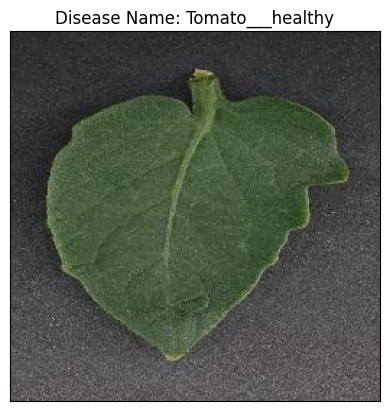

In [99]:
# Displaying the disease prediction
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()